#               LOAN PREDICTION MACHINE LEARNING PROJECT

#### The main objective for this dataset:----->
#### Using machine learning techniques to predict loan status.
#### target value: Loan_Status

#### THE DATASET CONATINS 614 RECORDS AND 13 ATTRIBUTES

In [233]:
#Features ->

# Loan_ID ---A uniques loan id
# Gender
# Married ---Maritul status
# Dependents ---No. of persons depending on clients
# Education --- graduate or not
# Self_Employed
# ApplicantIncome
# CoapplicantIncome
# LoanAmount(in thousands)
# Loan_Amount_Term(in months)
# Credit_History
# Property_Area
# Loan_Status

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [235]:
df = pd.read_csv("C:\\Users\\Prachi Kumbhkar\\Downloads\\loan dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [236]:
df.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
322,LP002054,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural,Y
236,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N
156,LP001541,Male,Yes,1,Graduate,No,6000,0.0,160.0,360.0,NaN,Rural,Y
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
123,LP001432,Male,Yes,2,Graduate,No,2957,0.0,81.0,360.0,1.0,Semiurban,Y
393,LP002265,Male,Yes,2,Not Graduate,No,1993,1625.0,113.0,180.0,1.0,Semiurban,Y
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
549,LP002777,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural,Y
559,LP002804,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban,Y


### Performing EDA(exploratory data analysis)

In [237]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [238]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


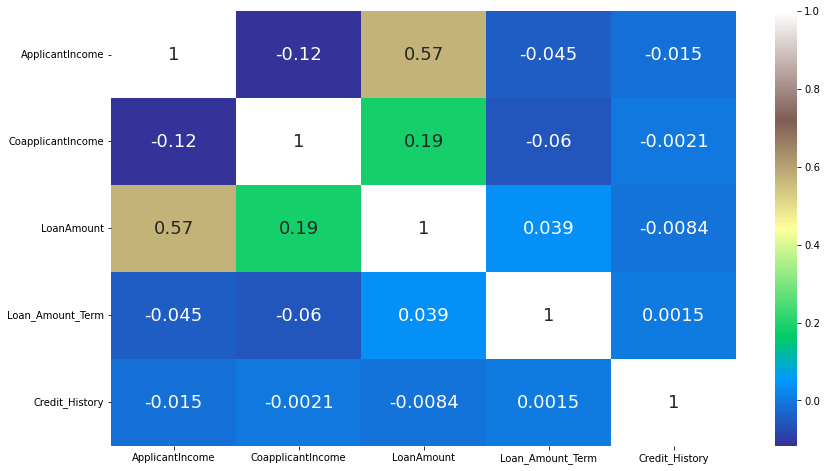

In [240]:

plt.figure(figsize = (14,8))
sns.heatmap(df.corr()  ,annot = True ,annot_kws={"size":18} , cmap = 'terrain')    #   annotations
plt.show()

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

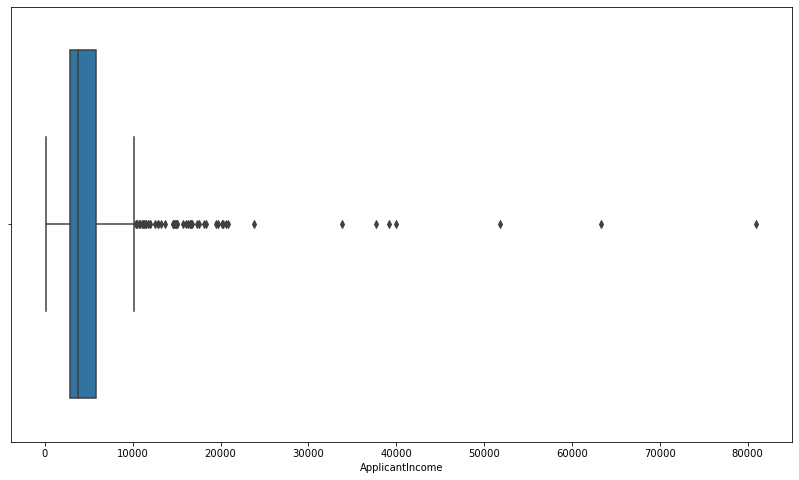

In [241]:
plt.figure(figsize = (14,8))
sns.boxplot(df['ApplicantIncome'])

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

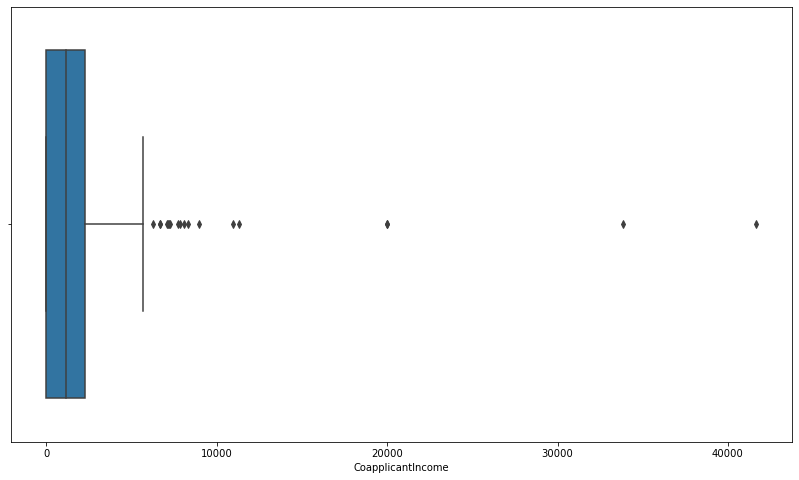

In [242]:
plt.figure(figsize = (14,8))
sns.boxplot(df['CoapplicantIncome'])

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

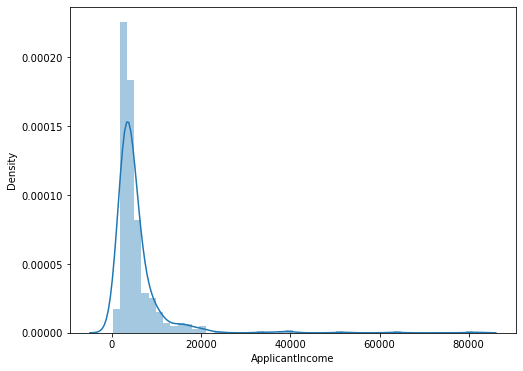

In [243]:
plt.figure(figsize=(8, 6))
# plt.hist(df['ApplicantIncome' ], bins=20, color='skyblue', edgecolor='black')
sns.distplot(df['ApplicantIncome'])

In [244]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

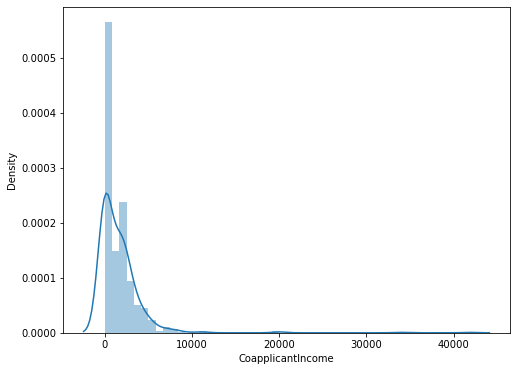

In [245]:
plt.figure(figsize=(8, 6))
# plt.hist(df['CoapplicantIncome' ], bins=20, color='skyblue', edgecolor='black')
sns.distplot(df['CoapplicantIncome'])

In [246]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [247]:
print(df['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


# outlier detection

In [248]:

q1 = df['ApplicantIncome'].quantile(0.25)

q3 = df['ApplicantIncome'].quantile(0.75)



In [249]:
# Calculate the interquartile range (IQR)
iqr = q3 - q1
iqr

2917.5

In [250]:
maximum_applicant = q3+1.5*iqr
minimum_applicant = q1-1.5*iqr
print(maximum_applicant)
print(minimum_applicant)

10171.25
-1498.75


# outlier data

In [251]:
# for ApplicantIncome

In [252]:
df[df['ApplicantIncome']>maximum_applicant]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N


In [253]:
df[df['ApplicantIncome']>maximum_applicant].shape

(50, 13)

In [254]:
df[df['ApplicantIncome']<minimum_applicant]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [255]:
# for coapplicantincome

In [256]:
q1 = df['CoapplicantIncome'].quantile(0.25)

q3 = df['CoapplicantIncome'].quantile(0.75)


In [257]:
iqr = q3-q1
iqr

2297.25

In [258]:
maximum_coapp = q3+1.5*iqr
minimum_coapp = q1-1.5*iqr
print(maximum_coapp)
print(minimum_coapp)

5743.125
-3445.875


In [259]:
df[df['CoapplicantIncome']>maximum_coapp]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [260]:
df[df['CoapplicantIncome']<minimum_coapp]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### trimming in CoapplicantIncome and ApplicantIncome

In [261]:
new_df = df[(df['CoapplicantIncome']<maximum_coapp )&( df['ApplicantIncome']<maximum_applicant)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [262]:
new_df.shape

(548, 13)

In [263]:
new_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

In [264]:
new_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,548.000000,548.000000,528.000000,534.000000,503.000000
mean,4128.978102,1359.425036,130.596591,342.584270,0.842942
std,1907.396960,1458.228533,52.532543,65.521343,0.364217
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2768.750000,0.000000,100.000000,360.000000,1.000000
50%,3656.000000,1293.500000,123.000000,360.000000,1.000000
75%,5000.000000,2250.000000,157.000000,360.000000,1.000000
max,10139.000000,5701.000000,376.000000,480.000000,1.000000


In [265]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            548 non-null    object 
 1   Gender             538 non-null    object 
 2   Married            545 non-null    object 
 3   Dependents         534 non-null    object 
 4   Education          548 non-null    object 
 5   Self_Employed      519 non-null    object 
 6   ApplicantIncome    548 non-null    int64  
 7   CoapplicantIncome  548 non-null    float64
 8   LoanAmount         528 non-null    float64
 9   Loan_Amount_Term   534 non-null    float64
 10  Credit_History     503 non-null    float64
 11  Property_Area      548 non-null    object 
 12  Loan_Status        548 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.9+ KB


In [266]:
mean_LoanAmount = new_df['LoanAmount'].mean()

In [267]:
mean_Loan_Amount_Term = new_df['Loan_Amount_Term'].mean()

In [268]:
mean_Credit_History = new_df['Credit_History'].mean()

In [269]:
mode_gender = df['Gender'].mode()[0]

In [270]:
mode_married = df['Married'].mode()[0]

In [271]:
mode_dependents = df['Dependents'].mode()[0]

In [272]:
mode_selfemp = df['Self_Employed'].mode()[0]

# filling with mean(numerical ) and mode(categorical)

In [273]:
fillna_df = new_df.fillna({'LoanAmount':mean_LoanAmount,'Loan_Amount_Term':mean_Loan_Amount_Term ,'Credit_History':mean_Credit_History , 
                          'Gender' : mode_gender , 'Married' :mode_married , 'Dependents' : mode_dependents ,'Self_Employed' :mode_selfemp })
fillna_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.596591,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [274]:
fillna_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling categorical features

In [275]:
unique_gender = fillna_df['Gender'].unique()
unique_married = fillna_df['Married'].unique()
unique_edu = fillna_df['Education'].unique()
unique_Self_Employed = fillna_df['Self_Employed'].unique()
unique_Property_Area = fillna_df['Property_Area'].unique()
print(unique_gender )
print(unique_married)
print(unique_edu)
print(unique_Self_Employed)
print(unique_Property_Area)
gender_counts = fillna_df['Gender'].value_counts()
print(gender_counts)
dependents_count = fillna_df['Dependents'].value_counts()
print(dependents_count) 

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
Male      447
Female    101
Name: Gender, dtype: int64
0     328
2      91
1      87
3+     42
Name: Dependents, dtype: int64


In [276]:
nominal_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
ordinal_cols = ['Property_Area']
target_col = 'Loan_Status'

## one hot encoding for nominal feature

In [277]:

ohe_nominal= OneHotEncoder(drop = 'first' , sparse = False)   
ohe_df = ohe_nominal.fit_transform(fillna_df[nominal_cols])
print(ohe_df)
print()
features=ohe_nominal.get_feature_names_out(nominal_cols)
print(features)
df_encoded_nominal = pd.DataFrame(ohe_df,columns=features )
df_encoded_nominal



# df_encoded_nominal = pd.DataFrame(ohe_nominal.fit_transform(fillna_df[nominal_cols]), columns=ohe_nominal.get_feature_names_out(nominal_cols))


[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]
 ...
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]]

['Gender_Male' 'Married_Yes' 'Education_Not Graduate' 'Self_Employed_Yes']


,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0
3,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
543,0.0,0.0,0.0,0.0
544,1.0,1.0,0.0,0.0
545,1.0,1.0,0.0,0.0
546,1.0,1.0,0.0,0.0


## ordinalencoding for ordinal feature

In [278]:
 
ord_ordinal = OrdinalEncoder(categories=[['Rural', 'Semiurban', 'Urban']])
ord_df = ord_ordinal.fit_transform(fillna_df[ordinal_cols])
# print(ord_df)
print('---------------------')


# Define feature names using column names and unique values
feature_names = []
for col_idx, col_name in enumerate(ordinal_cols):
    unique_values = fillna_df[col_name].unique()
    for unique_val in unique_values:
        feature_names.append(f"{col_name}_{unique_val}")
# Creating DataFrame with the encoded ordinal features
encoded_ordinal_df = pd.DataFrame(ord_df, columns=[ordinal_cols[0]])
encoded_ordinal_df
# df_encoded_ordinal = pd.DataFrame(ord_ordinal.fit_transform(fillna_df[ordinal_cols]), columns=ordinal_cols)


---------------------


,Property_Area
0,2.0
1,0.0
2,2.0
3,2.0
4,2.0
...,...
543,0.0
544,0.0
545,2.0
546,2.0


## labelencoding for target variable

In [279]:
# Apply LabelEncoder to target variable
lab_label = LabelEncoder()
df_encoded_target = pd.DataFrame(lab_label.fit_transform(fillna_df[target_col]), columns=[target_col])


## Concatenate the encoded columns 

In [280]:

df_final = pd.concat([df_encoded_nominal, df_encoded_ordinal, df_encoded_target], axis=1)
df_final

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,2.0,1
1,1.0,1.0,0.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,2.0,1
3,1.0,1.0,1.0,0.0,2.0,1
4,1.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...
543,0.0,0.0,0.0,0.0,0.0,1
544,1.0,1.0,0.0,0.0,0.0,1
545,1.0,1.0,0.0,0.0,2.0,1
546,1.0,1.0,0.0,0.0,2.0,1


## drop encoded columns

In [281]:
new_df_final = fillna_df.drop(columns = [ 'Loan_ID','Gender', 'Married','Education' ,'Self_Employed','Property_Area','Loan_Status'])
new_df_final

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,130.596591,360.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0
2,0,3000,0.0,66.000000,360.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0
610,3+,4106,0.0,40.000000,180.0,1.0
611,1,8072,240.0,253.000000,360.0,1.0
612,2,7583,0.0,187.000000,360.0,1.0


In [282]:
the_final = new_df_final.replace({'Dependents':'3+'  } , '4')
the_final

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,130.596591,360.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0
2,0,3000,0.0,66.000000,360.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0
610,4,4106,0.0,40.000000,180.0,1.0
611,1,8072,240.0,253.000000,360.0,1.0
612,2,7583,0.0,187.000000,360.0,1.0


In [283]:
df_final.reset_index(drop=True, inplace=True)
the_final.reset_index(drop=True, inplace=True)

## Making the final dataframe

In [284]:
df1 = pd.concat([the_final, df_final], axis=1)
df1

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area,Loan_Status
0,0,5849,0.0,130.596591,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1
1,1,4583,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0
2,0,3000,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,1.0,2.0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0,1
4,0,6000,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
543,0,2900,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1
544,4,4106,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,0.0,1
545,1,8072,240.0,253.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1
546,2,7583,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1


# input output feature

In [285]:
X = df1.iloc[:,:11]
y =df1.iloc[: , -1]

In [286]:
(X.shape),(y.shape)


((548, 11), (548,))

# train test split

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X_train ,X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 3) 

In [289]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area
425,0,2500,0.0,93.0,360.0,0.842942,0.0,0.0,0.0,1.0,2.0
271,1,1625,1803.0,96.0,360.0,1.000000,1.0,1.0,0.0,0.0,2.0
330,0,2500,0.0,96.0,480.0,1.000000,1.0,0.0,0.0,0.0,1.0
435,2,3547,0.0,80.0,360.0,0.000000,1.0,0.0,0.0,0.0,0.0
506,4,3400,2500.0,123.0,360.0,0.000000,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
480,1,4608,2845.0,140.0,180.0,1.000000,0.0,1.0,0.0,0.0,1.0
422,1,3450,2079.0,162.0,360.0,1.000000,1.0,1.0,0.0,1.0,1.0
119,0,3459,0.0,25.0,120.0,1.000000,1.0,1.0,0.0,1.0,1.0
256,0,4124,0.0,115.0,360.0,1.000000,0.0,0.0,0.0,0.0,1.0


In [290]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area
134,0,9166,0.0,244.000000,360.0,1.0,1.0,0.0,0.0,0.0,2.0
58,1,4945,0.0,130.596591,360.0,0.0,1.0,1.0,0.0,0.0,0.0
130,0,10000,1666.0,225.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0
386,0,2717,0.0,60.000000,180.0,1.0,1.0,0.0,1.0,0.0,2.0
192,2,5000,0.0,72.000000,360.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
304,0,4160,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,1.0
288,4,4342,189.0,124.000000,360.0,1.0,1.0,1.0,0.0,0.0,1.0
433,2,8333,0.0,246.000000,360.0,1.0,1.0,1.0,0.0,0.0,1.0
468,0,3775,0.0,110.000000,360.0,1.0,1.0,1.0,0.0,0.0,1.0


In [291]:
from sklearn.linear_model import LogisticRegression

In [292]:
logmodel = LogisticRegression()

In [293]:
logmodel.fit(X_train , y_train)

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [294]:
y_pred = logmodel.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [295]:
from sklearn.metrics import accuracy_score

In [296]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy 

82.72727272727273

In [297]:
confusion_matrix(y_test , y_pred)

array([[16, 16],
       [ 3, 75]], dtype=int64)

In [298]:
tn , fp , fn , tp = confusion_matrix(y_test,y_pred).ravel()
(tn , fp , fn , tp )

(16, 16, 3, 75)

In [299]:
matrix = classification_report(y_test,y_pred)
print('Classification report : \n' , matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.50      0.63        32
           1       0.82      0.96      0.89        78

    accuracy                           0.83       110
   macro avg       0.83      0.73      0.76       110
weighted avg       0.83      0.83      0.81       110



## Decision tree classifcation

In [300]:
dtc= DecisionTreeClassifier(random_state=42)


In [301]:

# Fit the classifier to the training data
dtc.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [302]:
# Predict the target variable on the testing data
y_pred = dtc.predict(X_test)
y_pred

# Evaluate the performance of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 75.45454545454545


In [229]:
## we are getting 75% accuracy for Decision tree classifier and for Logistic regression we get 82% ---------Logistic Regresson preferred